# Milestone 1



# Introduction

**Nama      : Titian Fitriana Prasasti**

***Batch    : 001 HCK***

**Dataset   :** BigQuery ml_datasets dari database bernama `credit_card_default`

### Assignment Objectives

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

### Problems

Membuat model-model Classification untuk memprediksi default_payment_next_month antara lain:
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. AdaBoost

### Data Dictionary
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

# Data Query 

SELECT * EXCEPT 

(id, predicted_default_payment_next_month)

FROM `bigquery-public-data.ml_datasets.credit_card_default`

# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import phik
 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler 
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

from sklearn.model_selection import GridSearchCV



# Data Loading

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('h8dsft_P1M1_Titian_Prasasti.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


In [4]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0


In [5]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,-2,379,0,0,0,0,0,0,0,0,0,0,0,0


# Cek Missing Value

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Tidak terdapat missing value pada dataset 

In [7]:
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


- kolom `bill_amt_n`

Tidak terlihat adanya anomali data dalam dataset, namun terdapat nilai negatif seluruh kolom `bill_amt_n`. Hal ini mengindikasikan nasabah memiliki ekstra kredit di bank. Bisa dibilang bank yg balik berhutang pada nasabah, hal ini dapat terjadi karena nasabah kelebihan bayar. Dapat juga terjadi ketika mendapatkan refund atau membatalkan suatu transaksi ketika balance kartu kredit `0`. Balance negatif sendiri bersifat netral dan tidak membahayakan credit score. Sehingga kita tidak perlu menghilangkan nilai negatif tersebut.

- kolom `pay_n`

Pada kolom ini juga terdapat nilai negatif. Jika meninjau labelnya nilai -1 artinya nasabah membayar sebelum jatuh tempo. Namun terdapat satu label yang tidak terdapat dalam dictionary variabel yaitu -2. Khusus untuk label -2 akan ditinjau kembali di EDA.

sumber: https://www.chase.com/personal/credit-cards/education/basics/negative-credit-card-balance#:~:text=A%20negative%20credit%20card%20balance%20is%20when%20your%20balance%20is,credit%20returned%20to%20your%20account.

### Checking Duplicate

In [8]:
data.duplicated().sum()

1

Terdapat 1 data duplikat dalam dataset

### Dropping Duplicate

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.reset_index(drop=True)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2960,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2961,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2962,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


# Exploratory Data Analysis (EDA)

[Text(0, 0, '2329'), Text(0, 0, '635')]

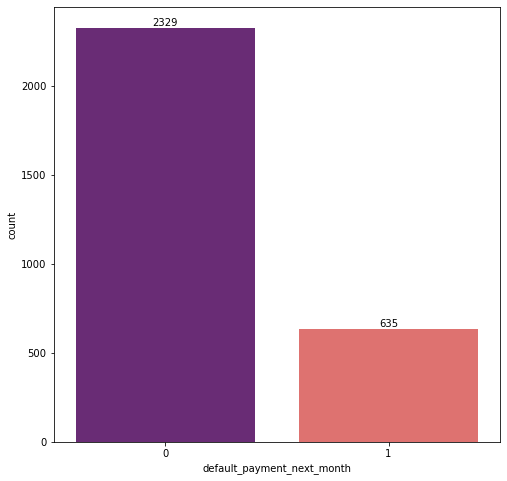

In [11]:
# Melihat jumlah data target

plt.figure(figsize=(8,8))
cp = sns.countplot(data=data, x='default_payment_next_month', palette='magma')
cp.bar_label(cp.containers[0], label_type='edge')

Dari grafik tersebut diketahui bahwa proporsi data target sangat imbalance.

### Numeric Data Distribution

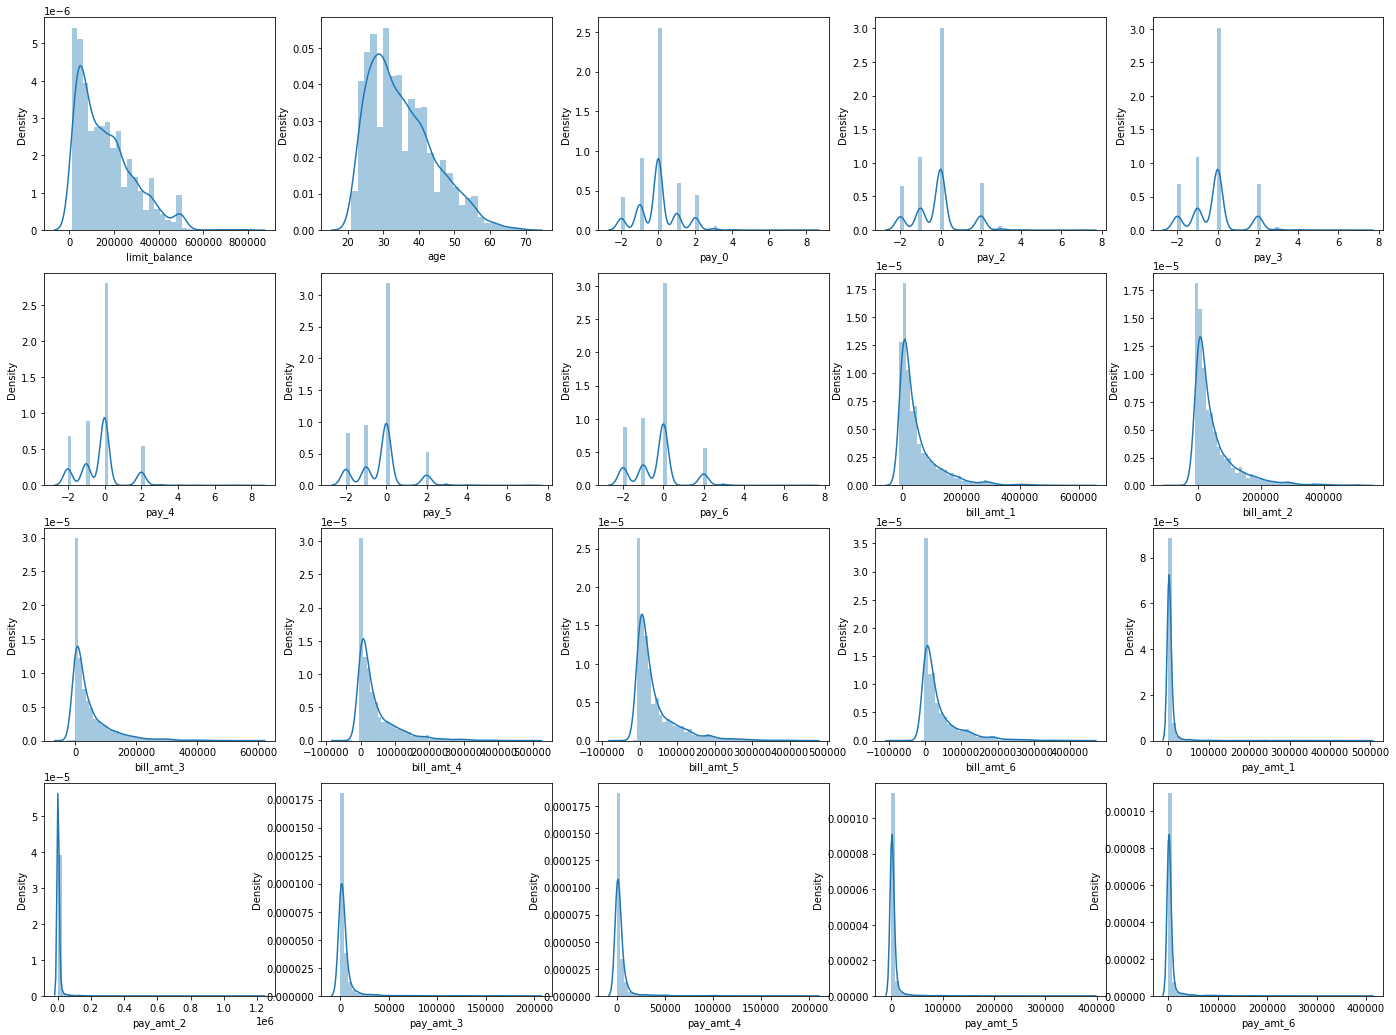

In [12]:
import warnings
warnings.filterwarnings("ignore")

cols_dis = ['limit_balance','age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']
fig, ax = plt.subplots(ncols=5,nrows=4,figsize=(24,18))
x=0
for i in range(4):
  for j in range(5):
    try:
      sns.distplot(data[cols_dis[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

In [13]:
data[['limit_balance','age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']].skew()

limit_balance     1.000605
age               0.772632
pay_0             0.927672
pay_2             0.862469
pay_3             0.932184
pay_4             1.102317
pay_5             1.060916
pay_6             0.979319
bill_amt_1        2.484229
bill_amt_2        2.457971
bill_amt_3        2.569559
bill_amt_4        2.447792
bill_amt_5        2.399944
bill_amt_6        2.432000
pay_amt_1        11.875903
pay_amt_2        29.399792
pay_amt_3         8.043463
pay_amt_4         8.450288
pay_amt_5        11.467169
pay_amt_6         9.758714
dtype: float64

Dari grafik dan perhitungan skew terlihat bahwa seluruh kolom numerik cenderung skew. Nantinya outlier akan di handling lebih jauh di bagian data preprocessing.

### Category Data Proportion

<AxesSubplot:xlabel='marital_status', ylabel='count'>

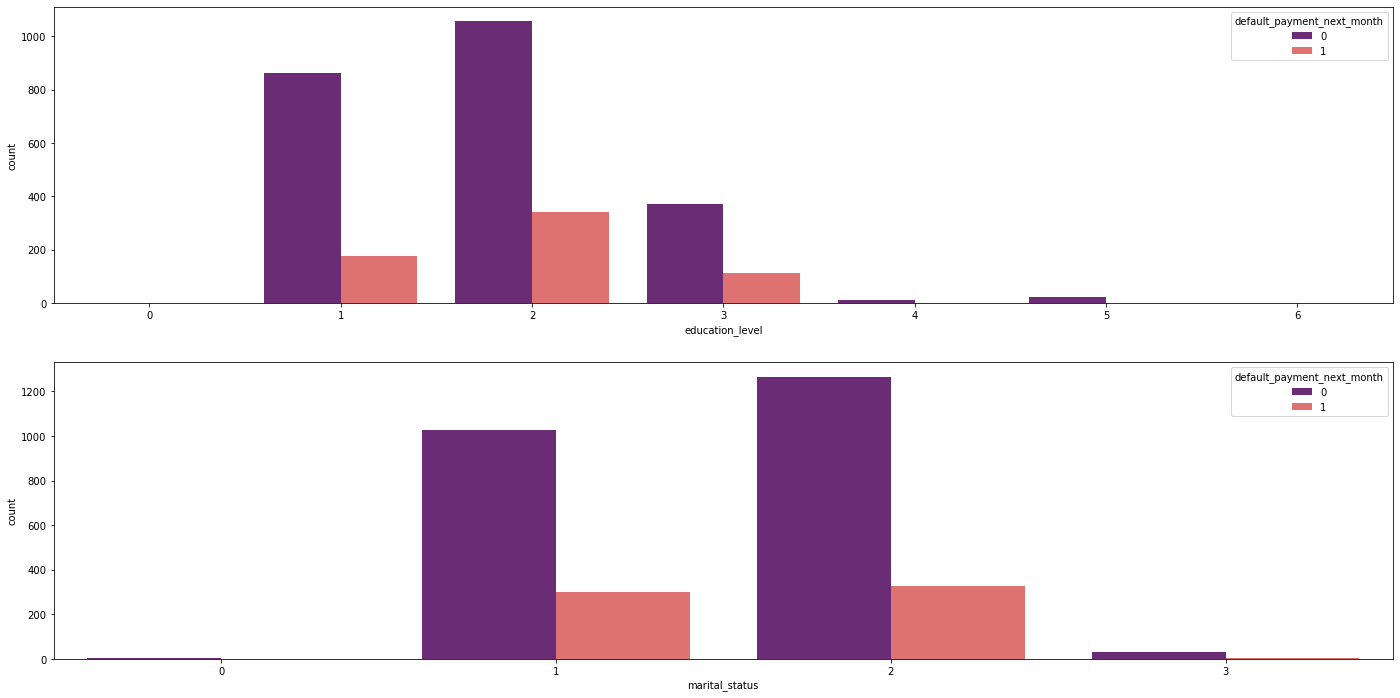

In [14]:
# Melihat deskripsi target dari kolom `education_level` dan `marital_status`

fig, ax = plt.subplots(nrows=2, figsize=(24,12))
sns.countplot(data=data, x='education_level', hue='default_payment_next_month', ax=ax[0], palette='magma')
sns.countplot(data=data, x='marital_status', hue='default_payment_next_month', ax=ax[1], palette='magma')

Pada visualisasi di atas dapat kita amati bahwa nasabah dengan tingkat pendidikan S1 memiliki tingkat default yang paling tinggi. Sedangkan untuk status pernikahan terbilang hampir sama kecuali untuk kategori 'others'

In [15]:
data.marital_status.value_counts()

2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64

In [16]:
data.education_level.value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

In [17]:
data[(data['education_level'] == 0) |
     (data['marital_status'] == 0)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
259,110000,2,3,0,31,0,0,0,0,0,0,89955,89989,84229,79288,73315,63818,7908,4000,5000,3000,3000,3000,0
1499,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1573,100000,1,0,2,37,0,0,-2,-2,-2,-2,7642,0,0,0,0,0,0,0,0,0,0,0,0
1860,100000,2,3,0,56,1,2,0,0,2,2,28625,27969,28812,31134,30444,32460,0,1500,2700,0,2400,0,0
2099,250000,1,0,1,35,-2,-2,-2,-2,-2,-2,22839,7745,12035,33604,0,1190,7783,12046,33718,0,1190,590,0
2277,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0


Terlihat bahwa terdapat 2 label '0' di kolom `education_level` dan 4 label '0' di kolom `marital_status`. Setelah ditinjau kembali, setiap label '0' tersebut berada pada data poin yang berbeda-beda. Bisa kita asumsikan label ini sebagai kesalahan input karena tidak memiliki definisi dan karena jumlahnya yang sedikit, kita akan drop baris yang memiliki label '0'.

In [18]:
# Dropping label `0` pada kolom `education_level` dan `marital_status`

indexNames = data[(data['education_level'] == 0) | (data['marital_status'] == 0)].index
data.drop(indexNames , inplace=True)

### Tinjauan Variabel Penyebab Default

Untuk menetapkan kartu kredit nasabah akan dibekukan (default) atau tidak terdapat beberapa hal yang patut diperhatikan:

1. History Pembayaran tagihan
- History pembayaran merupakan rekam pembayaran nasabah. Dalam history pembayaran tercatat jumlah tagihan setiap bulan, tanggal bayar minimum payment dan tanggal pelunasan tagihan. 
2. Penggunaan over limit
- Penggunaan kartu kredit yang overlimit dengan riwayat tagihan yang tidak kunjung lunas
3. Waktu pembayaran tagihan
- Kemungkinan default akan lebih besar ketika terdapat kecenderungan telat bayar
4. Tidak mampu melunasi tagihan max 6 bulan 
5. Tidak membayar minimum payment

Dari keterangan di atas dapat menjadi pertimbangan untuk menggunakan seluruh kolom yang tersedia karena dari semua kolom tersebut, baru kita bisa mendapatkan gambaran dan informasi yang lebih komprehensif terkait pembekuan kartu kredit. Di bawah ini akan diuraikan kembali terkait hal-hal di atas.

Sumber : https://www.bankrate.com/finance/credit-cards/credit-card-default/#:~:text=How%20credit%20card%20default%20happens,credit%20card%20is%20seriously%20delinquent.

<AxesSubplot:xlabel='pay_4', ylabel='count'>

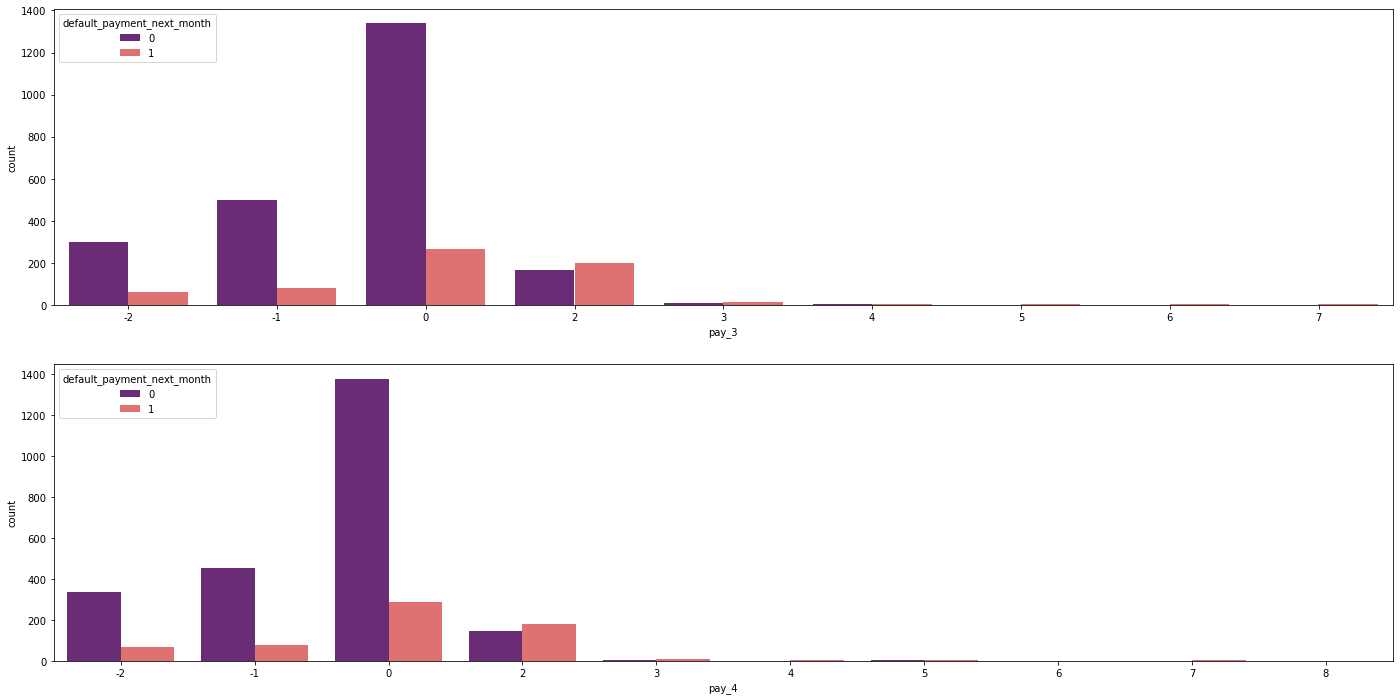

In [19]:
# Melihat deskripsi target dari kolom `pay_3` dan `pay_4`

fig, ax = plt.subplots(nrows=2, figsize=(24,12))
sns.countplot(data=data, x='pay_3', hue='default_payment_next_month', ax=ax[0], palette='magma')
sns.countplot(data=data, x='pay_4', hue='default_payment_next_month', ax=ax[1], palette='magma')

Pada kolom `pay_n` terdapat satu label yang tidak tercatat dalam data dictionary. Jika dilihat dari behavior datanya, label '-1' menandakan nasabah membayar tagihan/minimun payment sebelum tanggal jatuh tempo. Label '0' menandakan pembayaran tepat pada tanggal jatuh tempo dan label '1' menandakan keterlambatan bayar 1 bulan dari tanggal jatuh tempo. Terdapat satu behavior lagi terkait pembayaran tagihan, yaitu nasabah tetap dapat melakukan pembayaran meski tagihan belum terbit. Penulis kuat berasumsi bahwa lebel '-2' adalah nasabah dengan behavior tersebut. 

In [20]:
# Meninjau Pola data class 1 (default)
data[(data['pay_amt_2'] == 0) &
     (data['pay_2'] == -2)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1982,160000,1,3,2,38,1,-2,-2,-1,0,0,0,0,0,700,700,0,0,0,700,0,0,0,0
1991,360000,2,2,2,34,1,-2,-2,-1,0,0,0,1680,0,5950,6352,6563,1680,0,5950,500,317,1150,0
2002,300000,2,2,1,38,1,-2,-2,-1,0,-1,0,0,0,1000,890,390,0,0,1000,390,390,540,1
2004,290000,2,1,2,24,1,-2,-2,-1,0,-1,0,0,0,2700,1350,1350,0,0,2700,0,1350,8334,0
2005,200000,2,1,2,34,1,-2,-2,-1,2,2,0,0,0,347,197,2917,0,0,347,0,2720,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,150000,2,2,1,37,-2,-2,-2,-2,-2,-2,0,0,0,283,0,0,0,0,283,0,0,0,0
2326,370000,1,1,1,40,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
2329,50000,2,1,2,29,-2,-2,-2,-2,-2,-2,-101,-101,-101,-101,-101,1100,0,0,0,0,1201,0,0
2330,500000,1,1,1,35,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [83]:
!pip install dataframe_image

In [84]:
import dataframe_image as dfi

In [85]:
data[(data['default_payment_next_month'] == 1) &
     (data['pay_2'] == -2)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1992,350000,1,1,1,38,-2,-2,-1,0,0,-2,16459,4120,44164,35233,884,9924,941,44743,0,884,9924,10824,1
2002,300000,2,2,1,38,1,-2,-2,-1,0,-1,0,0,0,1000,890,390,0,0,1000,390,390,540,1
2005,200000,2,1,2,34,1,-2,-2,-1,2,2,0,0,0,347,197,2917,0,0,347,0,2720,0,1
2006,100000,2,1,1,47,1,-2,-1,2,2,2,-84,-474,800,410,20,-370,0,3000,0,0,0,2500,1
2007,80000,2,2,1,29,-2,-2,-1,2,2,-2,2801,0,21197,20400,20000,20000,0,21197,0,0,0,0,1
2010,500000,2,1,1,34,-2,-2,-1,2,2,-2,0,0,3500,3500,0,0,0,3500,0,0,0,0,1
2017,230000,2,3,2,42,1,-2,-1,-1,-1,-1,0,0,324,0,2600,3007,0,324,0,2600,3407,200,1
2035,120000,2,2,1,54,1,-2,-2,-2,-1,-1,-200,-200,-200,0,700,1935,0,0,200,700,1935,0,1
2042,110000,1,1,1,40,1,-2,-1,0,-1,-1,0,0,2066,2000,216,216,0,2066,0,216,216,66,1
2045,150000,2,1,2,30,1,-2,-2,-2,-1,0,0,0,0,0,1883,1883,0,0,0,1883,0,0,1


In [21]:
# Meninjau label -2
data[(data['pay_2'] == -2)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1981,60000,2,2,2,48,-2,-2,-2,-1,0,0,53044,51158,29452,1696,38585,38884,1607,1675,1696,38000,1500,1400,0
1982,160000,1,3,2,38,1,-2,-2,-1,0,0,0,0,0,700,700,0,0,0,700,0,0,0,0
1983,500000,1,2,2,36,1,-2,-1,0,0,0,226,8546,121867,116089,114293,118081,9125,126768,3468,4050,15099,5015,0
1984,200000,1,1,2,26,-2,-2,-1,0,0,0,0,1516,11533,9463,3884,3033,1516,11533,189,1000,2050,11300,0
1985,20000,2,3,2,31,-2,-2,-1,0,0,-1,-885,-885,18354,19064,19422,4390,20,21431,2300,558,4403,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,50000,2,1,2,29,-2,-2,-2,-2,-2,-2,-101,-101,-101,-101,-101,1100,0,0,0,0,1201,0,0
2330,500000,1,1,1,35,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
2331,120000,2,2,2,37,-2,-2,-2,-2,-2,-1,874,0,0,0,305,20502,0,0,0,305,21742,0,0
2332,400000,2,2,1,39,-2,-2,-2,-2,-2,-2,52306,3638,11649,24140,5803,5937,3656,11713,24265,7832,5966,9363,0


In [22]:
# Meninjau label -2
data[(data['pay_2'] == -2)].describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,234257.142857,1.705714,1.665714,1.468571,37.042857,-0.962857,-2.0,-1.851429,-1.694286,-1.628571,-1.580000,5294.771429,6097.822857,6926.580000,7323.322857,8525.065714,9164.194286,5073.100000,7514.908571,4820.857143,5368.748571,5049.308571,6655.665714,0.165714
std,122682.024954,0.456373,0.793759,0.516641,8.718843,1.428844,0.0,0.401552,0.722715,0.839078,0.865214,22679.298405,26674.157359,28892.122877,29482.233870,30503.807691,29306.491685,23651.369948,38021.854086,16856.712166,17620.861423,18377.411975,23876.382657,0.372356
min,10000.000000,1.000000,1.000000,1.000000,22.000000,-2.000000,-2.0,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-9850.000000,-9850.000000,-1307.000000,-3237.000000,-5459.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150000.000000,1.000000,1.000000,1.000000,30.000000,-2.000000,-2.0,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,220000.000000,2.000000,1.000000,1.000000,36.000000,-2.000000,-2.0,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,51.500000,273.500000,269.500000,325.500000,0.000000,147.500000,65.500000,133.000000,287.000000,207.000000,0.000000
75%,320000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,-2.0,-2.000000,-2.000000,-2.000000,-1.000000,2479.000000,2546.000000,3391.750000,2835.000000,3308.000000,3415.000000,2568.500000,3372.250000,2408.000000,2434.500000,2725.250000,3114.750000,0.000000
max,530000.000000,2.000000,5.000000,3.000000,68.000000,1.000000,-2.0,2.000000,2.000000,3.000000,3.000000,323408.000000,261444.000000,309622.000000,297039.000000,285447.000000,291183.000000,272817.000000,580464.000000,198748.000000,184637.000000,231133.000000,228300.000000,1.000000


Jika ditinjau dari data dapat kita amati bahwa adanya label '-2' pada kolom `pay_n` menyebabkan kecenderungan munculnya nilai '0' pada kolom `bill_amt_n` dan `pay_amt_n`. Nilai '0' pada kolom `bill_amt_n` mengindikasikan neraca kredit yang bernilai '0' karena tagihan sudah dilunasi sebelum terbitnya tagihan. Nilai '0' pada kolom `pay_amt_n` terlihat berkorespondensi dengan nilai '0' `bill_amt_n`. Artinya bisa memang tidak terdapat pembayaran atau data ini tidak mencatat pembayaran ketika tagihan belum terbit. Karena terdapat kerancuan sekaligus informasi penting dalam variabel tersebut sehingga dibutuhkan  tinjauan ke variabel lain seperti limit balance atau nilai limit kreditnya.

In [1]:
data.info()

NameError: name 'data' is not defined

In [23]:
limit_bal = data[(data['limit_balance'] > 100000) &
                 (data['default_payment_next_month'] == 1)].groupby(['limit_balance','default_payment_next_month'])[['bill_amt_1','bill_amt_2']].sum().reset_index()
limit_bal

,limit_balance,default_payment_next_month,bill_amt_1,bill_amt_2
0,110000,1,608356,609621
1,120000,1,1532120,1464203
2,130000,1,637640,651986
3,140000,1,835977,723464
4,150000,1,1511506,1460597
5,160000,1,446896,390840
6,170000,1,570031,593548
7,180000,1,947164,945739
8,190000,1,138308,113148
9,200000,1,1331029,1552553


Dari data di atas coba kita amati kolom `limit_balance` dan `bill_amt_1`. Dapat kita lihat bahwa nasabah yang terkena default cenderung menggunakan kartu kreditnya melebihi limit kreditnya. Sehingga variable `limit_balance` juga perlu dipertimbangkan.

### Feature Selection

In [24]:
data.corr().nlargest(23, 'default_payment_next_month')['default_payment_next_month']

default_payment_next_month    1.000000
pay_0                         0.357243
pay_2                         0.288965
pay_3                         0.275262
pay_4                         0.255165
pay_5                         0.253154
pay_6                         0.236983
education_level               0.045114
age                           0.017746
bill_amt_6                    0.005563
bill_amt_5                    0.005393
bill_amt_2                    0.000371
bill_amt_3                   -0.001627
bill_amt_4                   -0.005180
bill_amt_1                   -0.006379
sex                          -0.021890
marital_status               -0.028532
pay_amt_4                    -0.054036
pay_amt_2                    -0.059448
pay_amt_1                    -0.066392
pay_amt_5                    -0.066460
pay_amt_6                    -0.067343
pay_amt_3                    -0.090231
Name: default_payment_next_month, dtype: float64

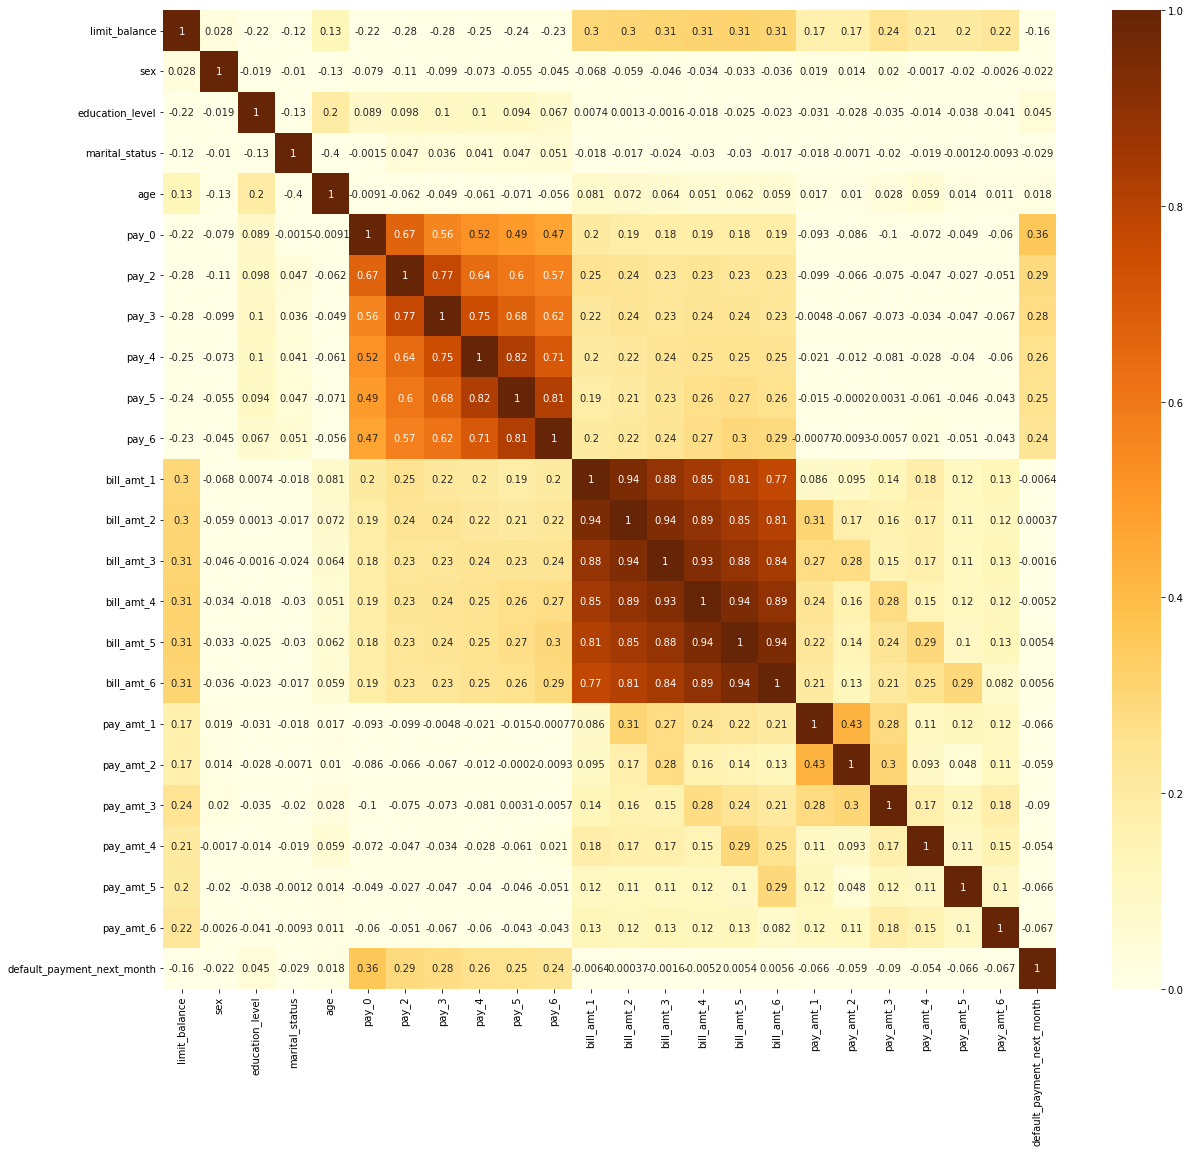

In [25]:
# Visualisasi korelasi 
corr = data.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, vmin=0, vmax=1, annot=True, cmap='YlOrBr')
plt.show()

Dari hasil perhitungan korelasi di atas memang terlihat bahwa kolom `pay_n` adalah kolom yang paling memiliki korelasi dengan kolom target namun nilai korelasinya sebenarnya termasuk rendah. Ditambah pertimbangan-pertimbangan di atas penulis memutuskan untuk menggunakan semua kolom yang ada.

# Data Preprocessing

### Data Inference

In [26]:
data_inf = data.sample(5, random_state=50)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2896,100000,1,3,2,49,-1,-1,-2,-2,-2,-2,1440,0,0,0,0,0,0,0,0,0,0,0,0
2394,140000,2,2,1,36,-1,-1,-1,-1,0,-1,165,341,165,1031,487,863,341,165,1031,0,863,487,1
12,110000,2,2,2,52,0,0,0,0,0,0,38298,39295,40331,41346,42013,42890,1935,1971,1986,1653,1706,1714,0
350,50000,1,1,2,38,0,0,0,0,0,0,50620,47164,48004,49307,19218,19465,3000,3014,6047,1000,2320,3000,0
432,40000,2,2,2,23,0,0,0,0,0,0,39402,39321,38246,39289,39882,39650,2000,2000,2000,1500,1500,2000,0


### Split Train & Test

In [27]:
# mendefinisikan feature dan target

X = data.drop(columns='default_payment_next_month', axis=1)
y = data['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0


In [28]:
# memisahkan data train dengan test

train, test = train_test_split(data, test_size=0.2, stratify=y, random_state=50)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (2366, 24)
Test size:  (592, 24)


In [29]:
# Memisahkan kolom numerik dan kategori
num_cols = ['limit_balance','age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']
cat_cols = ['education_level','marital_status']

num_data = train[num_cols]
cat_data = train[cat_cols]

### Handling Outlier

In [30]:
num_data.skew()

limit_balance     0.992124
age               0.801976
pay_0             0.846441
pay_2             0.829886
pay_3             0.934935
pay_4             1.103613
pay_5             1.092710
pay_6             0.992382
bill_amt_1        2.501434
bill_amt_2        2.501519
bill_amt_3        2.593606
bill_amt_4        2.433476
bill_amt_5        2.341999
bill_amt_6        2.344965
pay_amt_1        13.324717
pay_amt_2        30.074910
pay_amt_3         7.484394
pay_amt_4         7.922625
pay_amt_5        10.112761
pay_amt_6        10.097933
dtype: float64

Karena seluruh kolom numerik distribusinya skew, penulis memilih untuk melakukan winsorizing dengan metode iqr

In [31]:
winsor = Winsorizer(capping_method="iqr", tail="both", fold=3, variables=num_cols)
winsor.fit(train)
train_clean = winsor.transform(train).reset_index()

In [32]:
train_clean

,index,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,2291,120000.0,2,3,1,30.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,757.0,757.0,1549.0,757.0,757.0,1328.0,757.0,1549.0,757.0,757.0,1328.0,757.0,0
1,2225,100000.0,2,3,2,48.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2422.0,894.0,0.0,0.0,1639.0,923.0,894.0,0.0,0.0,1639.0,923.0,0.0,0
2,1995,290000.0,1,1,1,36.0,1.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,568.0,16166.0,16726.0,17427.0,0.0,568.0,16166.0,1000.0,1000.0,1000.0,0
3,1692,300000.0,2,2,1,34.0,1.0,2.0,0.0,0.0,0.0,-1.0,6451.0,4828.0,6858.0,8048.0,1701.0,2920.0,0.0,4004.0,2000.0,0.0,2920.0,2282.0,1
4,1679,110000.0,2,2,1,38.0,2.0,2.0,0.0,0.0,0.0,2.0,41619.0,40650.0,41744.0,42783.0,47476.0,45355.0,0.0,1750.0,1750.0,5400.0,700.0,1000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,782,20000.0,2,2,2,22.0,0.0,0.0,0.0,0.0,0.0,2.0,16072.0,17205.0,17903.0,18321.0,19680.0,18292.0,1700.0,1300.0,700.0,1643.0,0.0,1000.0,0
2362,419,240000.0,1,1,1,35.0,0.0,0.0,0.0,0.0,0.0,0.0,188964.0,183744.0,168683.0,155064.0,148969.0,148619.0,8000.0,6017.0,6900.0,5250.0,5400.0,6200.0,0
2363,2516,100000.0,2,3,2,41.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,7432.0,1633.0,2043.0,4830.0,3535.0,4307.0,1633.0,2043.0,4830.0,0.0,4307.0,0.0,1
2364,1363,60000.0,2,2,1,49.0,2.0,0.0,0.0,0.0,2.0,0.0,61093.0,57227.0,32091.0,32792.0,31277.0,29512.0,1739.0,1791.0,2378.0,0.0,1092.0,3554.0,1


### Split Feature & Target 

In [33]:
# memisahkan feature dengan target pada data train dan test

X_train = train_clean.drop(columns='default_payment_next_month')
y_train = train_clean['default_payment_next_month']

X_test = test.drop(columns='default_payment_next_month')
y_test = test['default_payment_next_month']

### Split Numerical & Categorical Column 

In [34]:
# Split Train-Set and Test-Set based on Column Types 

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

X_train_num

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,120000.0,30.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,757.0,757.0,1549.0,757.0,757.0,1328.0,757.0,1549.0,757.0,757.0,1328.0,757.0
1,100000.0,48.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2422.0,894.0,0.0,0.0,1639.0,923.0,894.0,0.0,0.0,1639.0,923.0,0.0
2,290000.0,36.0,1.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,568.0,16166.0,16726.0,17427.0,0.0,568.0,16166.0,1000.0,1000.0,1000.0
3,300000.0,34.0,1.0,2.0,0.0,0.0,0.0,-1.0,6451.0,4828.0,6858.0,8048.0,1701.0,2920.0,0.0,4004.0,2000.0,0.0,2920.0,2282.0
4,110000.0,38.0,2.0,2.0,0.0,0.0,0.0,2.0,41619.0,40650.0,41744.0,42783.0,47476.0,45355.0,0.0,1750.0,1750.0,5400.0,700.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,20000.0,22.0,0.0,0.0,0.0,0.0,0.0,2.0,16072.0,17205.0,17903.0,18321.0,19680.0,18292.0,1700.0,1300.0,700.0,1643.0,0.0,1000.0
2362,240000.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,188964.0,183744.0,168683.0,155064.0,148969.0,148619.0,8000.0,6017.0,6900.0,5250.0,5400.0,6200.0
2363,100000.0,41.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,7432.0,1633.0,2043.0,4830.0,3535.0,4307.0,1633.0,2043.0,4830.0,0.0,4307.0,0.0
2364,60000.0,49.0,2.0,0.0,0.0,0.0,2.0,0.0,61093.0,57227.0,32091.0,32792.0,31277.0,29512.0,1739.0,1791.0,2378.0,0.0,1092.0,3554.0


### Feature Scaling

Dilakukan untuk kolom/feature dengan tipe numerikal. Tujuannya untuk menyamakan/menyeragamkan range masing-masing featurenya, agar model lebih mudah dalam mempelajari pola/pattern dari feature ini.

In [35]:
# Feature Scaling using MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled.shape

(2366, 20)

### Feature Encoding

Dilakukan untuk kolom/feature dengan tipe kategorikal. Tujuannya untuk mengubah kolom kategorikal ini menjadi numeric karena model yang dibuat hanya bisa membaca data numerik.

In [36]:
# Feature Encoding using OneHotEncoder (nominal data) 

encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [37]:
edu_prf = pd.get_dummies(X_train_cat['education_level'], prefix='Edu')
edu_prf

,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
2361,0,1,0,0,0,0
2362,1,0,0,0,0,0
2363,0,0,1,0,0,0
2364,0,1,0,0,0,0


In [38]:
mar_prf = pd.get_dummies(X_train_cat['marital_status'], prefix='MarStat')
mar_prf

,MarStat_1,MarStat_2,MarStat_3
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2361,0,1,0
2362,1,0,0
2363,0,1,0
2364,1,0,0


In [39]:
prf_cols = ['Edu_1','Edu_2','Edu_3','Edu_4','Edu_5','Edu_6','MarStat_1','MarStat_2','MarStat_3']

In [40]:
X_train_cat_enc

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

### Concate Columns

In [41]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_train_final

array([[0.14473684, 0.1875    , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.11842105, 0.5625    , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.36842105, 0.3125    , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.11842105, 0.41666667, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.06578947, 0.58333333, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.05263158, 0.0625    , 0.4       , ..., 0.        , 1.        ,
        0.        ]])

In [42]:
# Create DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_cols+prf_cols])
X_train_final_df

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6,MarStat_1,MarStat_2,MarStat_3
0,0.144737,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.043437,0.019836,0.032472,0.108547,0.039031,0.261111,0.044089,0.091118,0.045879,0.048962,0.084965,0.046864,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.118421,0.562500,0.0,0.0,0.0,0.0,0.0,0.0,0.049315,0.020346,0.026355,0.105638,0.042989,0.259705,0.052068,0.000000,0.000000,0.106009,0.059053,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.368421,0.312500,0.6,0.0,0.2,0.2,0.4,0.4,0.040764,0.017021,0.028598,0.167760,0.110689,0.316993,0.000000,0.033412,0.979758,0.064679,0.063980,0.061908,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.381579,0.270833,0.6,0.8,0.4,0.4,0.4,0.2,0.063541,0.034976,0.053437,0.136565,0.043267,0.266637,0.000000,0.235529,0.121212,0.000000,0.186820,0.141274,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.131579,0.354167,0.8,0.8,0.4,0.4,0.4,0.8,0.187714,0.168192,0.191199,0.270044,0.248675,0.413936,0.000000,0.102941,0.106061,0.349266,0.044786,0.061908,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,0.013158,0.020833,0.4,0.4,0.4,0.4,0.4,0.8,0.097512,0.081004,0.097053,0.176042,0.123945,0.319996,0.099011,0.076471,0.042424,0.106267,0.000000,0.061908,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2362,0.302632,0.291667,0.4,0.4,0.4,0.4,0.4,0.4,0.707968,0.700335,0.692472,0.701515,0.704109,0.772381,0.465936,0.353941,0.418182,0.339564,0.345489,0.383830,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2363,0.118421,0.416667,0.2,0.2,0.2,0.2,0.4,0.2,0.067005,0.023094,0.034423,0.124199,0.051497,0.271452,0.095109,0.120176,0.292727,0.000000,0.275560,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2364,0.065789,0.583333,0.8,0.4,0.4,0.4,0.8,0.4,0.256474,0.229839,0.153080,0.231650,0.175985,0.358942,0.101283,0.105353,0.144121,0.000000,0.069866,0.220021,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Definition

### Model Objectives

Pada dataset ini kita akan meninjau 7 model untuk dilihat model mana yang memiliki skor recall terbaik. Kita akan fokus pada skor recall karena kita akan melihat kemampuan model dalam memdeteksi label '1' atau default. Seberapa baik model dapat meprediksi label '1' dengan benar untuk menghindari terjadinya kesalahan klasifikasi. Kita tidak ingin meloloskan nasabah yang harusnya terkena default tapi malah tidak terdeteksi. Hal ini jauh merugikan credit issuer karena jika tidak segera di default maka nasabah nakal tersebut akan terus berhutang tetapi tidak bisa bayar. Uang yang keluar dari credit issuer tidak kembali. Sedangkan ketika salah mendeteksi nasabah default tetapi harusnya tidak, jika nasabah merasa credit historynya baik maka nasabah tersebut akan melayangkan komplain agar issue yang terjadi bisa teratasi. Jika dibandingkan tentu cost nya lebih besar untuk terus memberi hutang kepada nasabah yang tidak bisa bayar daripada mengurus komplain nasabah atau bahkan kehilangan nasabah dengan kredit history yang baik.

In [43]:
# defining logistic regression model
log_model = LogisticRegression()
# defining SVM model
svc_model = SVC()
# defining KNN model
knn_model = KNeighborsClassifier()
# defining naive bayes model
nb_model = GaussianNB()
# defining decision tree model
tree_model = DecisionTreeClassifier(random_state=49)
# defining random forest model
forest_model = RandomForestClassifier(random_state=49)
# defining ada boost model
ada_model = AdaBoostClassifier(random_state=49)

# Model Training

In [44]:
# Training logistic regression model
log_model.fit(X_train_final_df,y_train)
# Training SVM model
svc_model.fit(X_train_final_df,y_train)
# Training KNN
knn_model.fit(X_train_final_df,y_train)
# Training naive bayes model
nb_model.fit(X_train_final_df,y_train)
# Training decision tree model
tree_model.fit(X_train_final_df,y_train)
# Training random forest model
forest_model.fit(X_train_final_df,y_train)
# Training ada boost model
ada_model.fit(X_train_final_df,y_train)

AdaBoostClassifier(random_state=49)

# Cross Validation

In [45]:
# defining strstified cv
skfold = StratifiedKFold(n_splits=10)

In [46]:
# Logistic Regression

scores = cross_val_score(log_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.2657647058823529
0.05122596960090896
[0.25490196 0.23529412 0.2745098  0.33333333 0.23529412 0.21568627
 0.18       0.36       0.29411765 0.2745098 ]


In [47]:
# SVM

scores = cross_val_score(svc_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.26364705882352946
0.06212092732475757
[0.31372549 0.23529412 0.33333333 0.31372549 0.29411765 0.17647059
 0.14       0.32       0.2745098  0.23529412]


In [48]:
# KNN

scores = cross_val_score(knn_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))

0.2952549019607843
0.08248550488392128


In [49]:
# Naive Bayes

scores = cross_val_score(nb_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))

0.9527843137254901
0.029306058411060067


In [50]:
# Decision Tree

scores = cross_val_score(tree_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.38976470588235296
0.054698347924476205
[0.37254902 0.39215686 0.35294118 0.39215686 0.35294118 0.41176471
 0.28       0.5        0.43137255 0.41176471]


In [51]:
# Random Forest

scores = cross_val_score(forest_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))

0.36007843137254897
0.05770593232193876


In [52]:
# Ada Boost

scores = cross_val_score(ada_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
print(np.mean(scores))
print(np.std(scores))

0.3760392156862745
0.07801663876792161


Ditemukan dengan metrik skor cross validasi pada setiap model, model dengan skor recall terbaik adalah Gaussian Naive Bayes dengan skor sebesar 0.95 pada label minority (default=yes). Output ini senada dengan beberapa pengerjaan dataset sejenis mengenai deteksi default kartu kredit. 

sumber : 
1. https://www.researchgate.net/publication/328026972_Application_of_Machine_Learning_Algorithms_in_Credit_Card_Default_Payment_Prediction#:~:text=The%20best%20performing%20model%20for,banking%20system%20in%20decision%20making.
2. https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618

# Model Evaluation

In [53]:
# creating NB prediction data
nb_y_pred_train = nb_model.predict(X_train_final_df)
nb_y_pred_test = nb_model.predict(X_test_final)

In [54]:
# Evaluating NB model
print("Training")
print(classification_report(y_train,nb_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,nb_y_pred_test))

Training
              precision    recall  f1-score   support

           0       0.93      0.18      0.30      1858
           1       0.24      0.95      0.38       508

    accuracy                           0.35      2366
   macro avg       0.58      0.56      0.34      2366
weighted avg       0.78      0.35      0.32      2366



Test
              precision    recall  f1-score   support

           0       0.92      0.25      0.40       465
           1       0.25      0.92      0.40       127

    accuracy                           0.40       592
   macro avg       0.59      0.59      0.40       592
weighted avg       0.78      0.40      0.40       592



Dalam classification report tersebut didapati skor recall yang sesuai dengan prediksi skor cross validation sebesar 0.95 di data train. Setelah di predict ke data test hasilnya masih fit. Artinya model belajar dengan baik dan mampu mendeteksi label minority dengan baik. Namun jika dilihat dari skor accuracy pasti jelek karena skor precisionnya yang kecil. Metrik accuracy menjadi tidak relevan karena melihat kinerja model dari seberapa baik model tersebut dapat memprediksi setiap label dengan benar. Sedangkan kita kali ini hanya fokus pada label minority saja. Selanjutnya mari kita tinjau dari confussion matrix.

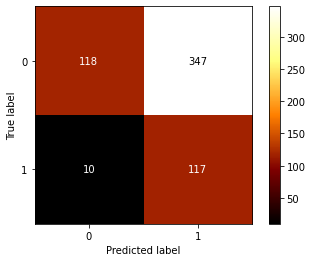

In [76]:
# Plotting confusion matrix
plot_confusion_matrix(nb_model, X_test_final, y_test, colorbar=True, cmap='afmhot') 

Pada matriks ini terlihat label minority yang diprediksi dengan benar sejumlah 117 (true positif) dan yang salah prediksi sejumlah 10 (false positif). Untuk label mayoritas atau label tidak default yang dapat diprediksi dengan benar sejumlah 118 (true negatif) yang salah prediksi sejumlah (347). Inilah kenapa di awal kita mengabaikan precision, khususnya pada model gaussian naive bayes karena cost untuk menaikan recall adalah mengorbankan precision hal ini ditambah dengan kecenderungan model naive bayes yang berbasis probabilita dengan pola 0% atau 100% jadi behavior modelnya cukup rigid. 

Selanjutnya mari kita coba tuning hyperparameter pada model naive bayes. Hyperparameter yang bisa kita tuning adalah var_smoothing, parameter ini bertujuan mengurangi rigiditas model naive bayes. 

### Hyperparameter Tunning

Hyperparameter tuning menggunakan metode GridSearchCV untuk membantu menentukan hyperparameter yang paling optimal dengan asumsi dapat meningkatkan performa model.

In [56]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [57]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=skfold, n_jobs=-1)
nbModel_grid.fit(X_train_final_df,y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.43287612810830584)


Hyperparameter yang terbaik adalah var_smoothing dengan nilai 0.43287612810830584

Kemudian mari kita aplikasikan hyperparameter tersebut pada model kita 

In [58]:
nbtun_y_pred_train = nbModel_grid.predict(X_train_final_df)
nbtun_y_pred_test = nbModel_grid.predict(X_test_final)

In [59]:
# Evaluating KNN model
print("Training")
print(classification_report(y_train,nbtun_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,nbtun_y_pred_test))

Training
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1858
           1       0.65      0.34      0.45       508

    accuracy                           0.82      2366
   macro avg       0.74      0.65      0.67      2366
weighted avg       0.80      0.82      0.80      2366



Test
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       465
           1       0.69      0.41      0.51       127

    accuracy                           0.83       592
   macro avg       0.77      0.68      0.71       592
weighted avg       0.82      0.83      0.82       592



Sekilas skor accuracy menjadi sangat baik yang tadinya 0.4 menjadi 0.83. Skor precision juga meningkat tapi sayang bukan itu yang kita inginkan. Skor recall anjlok demi meningkatnya akurasi model. Sehingga kita kembalikan kepada objectives kita di atas terkait skor recall. Alhasil bisa dibilang performa model memprediksi label minority lebih baik ketika menggunakan parameter default dari pada setelah di tuning.

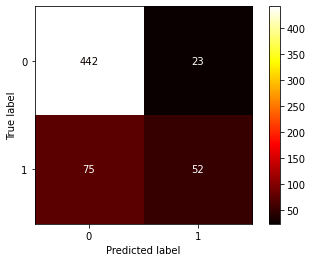

In [82]:
# Plotting confusion matrix
plot_confusion_matrix(nbModel_grid, X_test_final, y_test, colorbar=True, cmap='hot') 

# Model Inference

In [61]:
datainf = data_inf.reset_index(drop=True)
datainf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,100000,1,3,2,49,-1,-1,-2,-2,-2,-2,1440,0,0,0,0,0,0,0,0,0,0,0,0
1,140000,2,2,1,36,-1,-1,-1,-1,0,-1,165,341,165,1031,487,863,341,165,1031,0,863,487,1
2,110000,2,2,2,52,0,0,0,0,0,0,38298,39295,40331,41346,42013,42890,1935,1971,1986,1653,1706,1714,0
3,50000,1,1,2,38,0,0,0,0,0,0,50620,47164,48004,49307,19218,19465,3000,3014,6047,1000,2320,3000,0
4,40000,2,2,2,23,0,0,0,0,0,0,39402,39321,38246,39289,39882,39650,2000,2000,2000,1500,1500,2000,0


In [62]:
X_inf_num = datainf[num_cols]
X_inf_cat = datainf[cat_cols]

In [63]:
X_inf_scaled = scaler.transform(X_inf_num)
X_inf_scaled

array([[0.11842105, 0.58333333, 0.2       , 0.2       , 0.        ,
        0.        , 0.        , 0.        , 0.04584812, 0.0170211 ,
        0.02635512, 0.10563803, 0.03563399, 0.25650126, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.17105263, 0.3125    , 0.2       , 0.2       , 0.2       ,
        0.2       , 0.4       , 0.2       , 0.04134628, 0.01828922,
        0.0270067 , 0.10959994, 0.03781933, 0.25949687, 0.01986051,
        0.00970588, 0.06248485, 0.        , 0.05521433, 0.0301492 ],
       [0.13157895, 0.64583333, 0.4       , 0.4       , 0.4       ,
        0.4       , 0.4       , 0.4       , 0.17598826, 0.16315268,
        0.1856192 , 0.26452163, 0.22416075, 0.40537925, 0.1126982 ,
        0.11594118, 0.12036364, 0.10691417, 0.10914907, 0.10611032],
       [0.05263158, 0.35416667, 0.4       , 0.4       , 0.4       ,
        0.4       , 0.4       , 0.4       , 0.21949542, 0.19241618,
        0.2159193 , 0.295114  , 0.12187176, 0

In [64]:
X_inf_cat_enc = encoder.transform(X_inf_cat).toarray()
X_inf_cat_enc

array([[0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.]])

In [65]:
X_inf_final = np.concatenate([X_inf_scaled,X_inf_cat_enc], axis=1)
X_inf_final

array([[0.11842105, 0.58333333, 0.2       , 0.2       , 0.        ,
        0.        , 0.        , 0.        , 0.04584812, 0.0170211 ,
        0.02635512, 0.10563803, 0.03563399, 0.25650126, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.17105263, 0.3125    , 0.2       , 0.2       , 0.2       ,
        0.2       , 0.4       , 0.2       , 0.04134628, 0.01828922,
        0.0270067 , 0.10959994, 0.03781933, 0.25949687, 0.01986051,
        0.00970588, 0.06248485, 0.        , 0.05521433, 0.0301492 ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.13157895, 0.64583333, 0.4       , 0.4       , 0.4       ,
        0.4       , 0.4       , 0.4       , 0.17598826, 0.16315268,
        0.1856192 , 0.26452163, 0.22416075, 0.40537925, 0.1126982 ,
  

In [66]:
nb_y_pred_inf = nbModel_grid.predict(X_inf_final)
nb_y_pred_inf_df = pd.DataFrame(nb_y_pred_inf, columns=['Prediksi GaussianNB'])
print(nb_y_pred_inf_df)

   Prediksi GaussianNB
0                    0
1                    0
2                    0
3                    0
4                    0


In [67]:
# Joining inference data with predictions
pd.concat([datainf,nb_y_pred_inf_df], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Prediksi GaussianNB
0,100000,1,3,2,49,-1,-1,-2,-2,-2,-2,1440,0,0,0,0,0,0,0,0,0,0,0,0,0
1,140000,2,2,1,36,-1,-1,-1,-1,0,-1,165,341,165,1031,487,863,341,165,1031,0,863,487,1,0
2,110000,2,2,2,52,0,0,0,0,0,0,38298,39295,40331,41346,42013,42890,1935,1971,1986,1653,1706,1714,0,0
3,50000,1,1,2,38,0,0,0,0,0,0,50620,47164,48004,49307,19218,19465,3000,3014,6047,1000,2320,3000,0,0
4,40000,2,2,2,23,0,0,0,0,0,0,39402,39321,38246,39289,39882,39650,2000,2000,2000,1500,1500,2000,0,0


# Conceptual Problems

Jawab pertanyaan berikut:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Jawab: 

- Entrophy : merupakan sebuah pengukuran terkait impurity atau ketidakmurnian dalam dataset. Dalam tree base model, data di split berdasarkan dari nilai vektor yang berasosiasi dengan setiap data point. Semakin data di split maka data akan semakin homogen, hal ini akan mengurangi nilai entropy. Tetapi ketika sebagian data tidak bisa  menjadi homogen, pada situasi inilah nilai entropy akan meningkat. Semakin tinggi nilai entropy maka model akan semakin sulit dalam mengambil keputusan.

- Information Gain : merupakan sebuah pengukuran terkait pengurangan nilai entropy. Entropy mengukur impurity data sedangkan information gain mengukur penurunan impurity tersebut. Fitur yang memiliki nilai impurity yang kecil adalah root node yang ideal. Information gain digunakan untuk memilih fitur mana yang akan di split pada setiap depth. 

- Gini :  Gini Index adalah suatu nilai yang menunjukkan kemurnian dari sebuah atribut. Jika Gini Index bernilai nol maka atribut tersebut dapat dikatakan murni, atau atribut tersebut hanya mengandung satu kelas/label saja. Tetapi jika Gini Index lebih dari nol, maka atribut tersebut dapat dikatakan tidak murni, atau atribut tersebut mengandung kelas/label yang harusnya milik atribut lain.

source : `https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d`

2. Apakah fungsi dari pruning pada Tree model?

Jawab: 

Pruning atau pemangkasan adalah salah satu metode untuk mengatasi over-fitting pada tree-based model. Pruning bertujuan untuk mengurangi kompleksitas dari Tree yang dibuat dengan cara memangkas leafs/nodes yang tidak memiliki kekuatan/signifikansi dalam klasifikasi label (weakest link). Cara mengetahui leaf/nodes mana yang merupakan weakest link adalah dengan menghitung nilai alpha-nya, nilai alpha yang kecil menunjukkan weakest link dan bagian inilah yang sebaiknya di pruning.

source : `https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107`

3. Bagaimana cara memilih K yang optimal pada KNN?

Jawab : 

Nilai K yang optimal biasanya didapatkan dari trial and error karena setiap dataset memiliki behavior dan sebaran data yang berbeda-beda. Caranya dengan menguji model beberapa kali dengan nilai K yang kita set secara random sampai didapat skor akurasi yang dianggap paling baik.

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

Jawab :

Cross Validation adalah salah satu metode yang digunakan untuk mengevaluasi performa model yang dibuat. Kita split data yang kita punya menjadi beberapa bagian kecil secara acak/random untuk selanjutnya dihitung performa yang didapatkan dari data yang sudah kita pecah itu. Dari rentang skor yang didapat kurang lebih dapat menggambarkan atau meprediksi performa model yang nantinya akan kita gunakan.


5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Jawab:

- Accuracy : Proporsi/rasio dari hasil prediksi kelas yang benar dibandingkan dengan jumlah total datanya.
- Precision : Precision menjelaskan proporsi dari true negatif dari keseluruhan label negatif yang prediksi hal ini termasuk false negatif.
- Recall : Recall menjelaskan berapa proporsi dari semua true positif yang dapat diprediksi dengan benar.
- F1 Score : F1 Score merupakan rata-rata dari nilai recall dan precision. Jadi nilainya akan berhubungan dengan recall ataupun precision, jika nilai precision kecil maka F1 score akan kecil juga begitu pula jika nilai recall kecil maka nilai F1 score juga akan kecil. Secara rumus dapat ditulis.

source : `https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226`

# Kesimpulan

Model terbaik telah berhasil dibuat untuk mengklasifikasi nasabah yang terkena default. Dalam penyusunan model ini adapun langkah-langkah yang harus dilakukan antara lain:

- Exploratory Data Analysis (EDA)

Dalam EDA dilakukan visualisasi dan juga analisis terkait kolom-kolom yang tersedia. Pertama kita melihat proporsi label klasifikasi, hasilnya ditemukan bahwa proporsinya bisa dibilang moderately imbalance tetapi data masih bisa kita olah lebih lanjut. Kemudian dilakukan visualisasi data numerik untuk melihat skewness sebagai acuan melakukan outlier handling di data preprocessing. Kemudian terdapat sedikit pertimbangan terkait mekanisme default kartu kredit untuk menjadi pertimbangan dalam pemilihan fitur. Penulis sendiri mempertimbangkan untuk memakai seluruh fitur dari informasi tersebut. Hal ini didukung oleh nilai korelasi yang  reltif kecil pada setiap kolom pada dataset, artinya seluruh fitur akan memiliki sumbangsih terhadap penentuan kelas dari data tersebut.

- Data Preprocessing

Dalam data preprocessing yg pertama dilakukan adalah split data inference. Kemudian split train test dan menghandle outlier di kolom train menggunakan winsorizer. Selanjutnya split target dan fitur yang dilanjutkan feature scalling dan encoding. Sebenarnya data kategori sudah terencoding secara ordinal tetapi karena kolom marital status itu nominal dan kolom educational level memiliki urutan yang terbalik sehingga diputuskan untuk melakukan one hot endcoder terhadap dua fitur kategori tersebut. 

- Model Definition dan Training

Selanjutnya kita mendefinisikan ke tujuh model yang akan kita lakukan cross validation kemudian di training.

- Cross Validation

Setelah training kita uji cross validasinya menggunakan cross val score dengan scoring recall sesuai dengan objectives dari pembuatan model. Didapat skor recal tertinggi dengan nilai 0.95 diperoleh model Gaussian Naive Bayes. 

- Model Evaluation

Selanjutnya kita mengevaluasi model naive bayes, didapati skor recall sesuai prediksi uji cross validation dengan model yang terbilang fit.

- Hyperparameter Tuning

Kemudian kita melakukan hyperparameter tuning dengan grid search cv dengan harapan untuk meningkatkan performa model. 

- Evaluasi Model yg sudah di tuning

Setelah dituning sayangnya skor recall turun jauh dari 0.95 menjadi 0.34 di data train dan 0.41 di data test. Sedangkan yang meningkat adalah akurasi dan skor precision. Jika ditinjau secara umum memang performa membaik tapi ketika yang kita butuhkan adalah recallnya saja menjadikan model yang sudah di tuning malah turun performanya. Sehingga dapat ditarik kesimpulan bahwa bisa terjadi penurunan performa pada model yang sudah di tuning terlebih jika fokus objectives nya beradapa pada klasifikasi label minoritas.

- Model Inference

Dilakukan pengetesan kembali dengan data inference atau data baru yang belum pernah dilihat oleh model. Data ini sebelumnya sudah dipisah terlebih dahulu di awal agar tidak terjadi kebocoran data. Model inference sendiri bertujuan untuk melihat bagaimana performa model terhadap data baru. Sebelum dilakukan uji inference, data harus kembali di scalling dan encoding. Dari hasil prediksi menggunakan model yang sudah di tuning nampak model mengklasifikasikan nasabah yang harusnya default menjadi tidak default sedangkan inilah yang kita hindari. Sehingga menambah insight bahwa model hasil tuning memang kurang akurat dalam memprediksi label minoritas.

